# Quotes' complexity analysis
This notebook conducts quotes' complexity analysis - it tries to identify how grammar, lexical and  readability levels changes across  years, parties and speakers.

Let's first load the data:

In [76]:
import textstat as ts # pip install textstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#load pickle
PICKLE_PATH = "../data/binary/us-politicians.pickle"
df = pd.read_pickle(PICKLE_PATH)
df.head()

,speaker_id,quote_id,quotation,speaker,party,Date-Time
0,1282411,2015-06-11-000090,25-year cost estimate for the U.S. nuclear mod...,Ed Markey,29552,2015-06-11
1,1282411,2015-08-11-090504,The state is transitioning to a higher percent...,Ed Markey,29552,2015-08-11
2,1282411,2015-10-27-125840,This highly coveted TIGER grant funding would ...,Ed Markey,29552,2015-10-27
3,1282411,2015-01-19-008025,carefully cutting the Gordian knot that has ti...,Ed Markey,29552,2015-01-19
4,1282411,2015-12-09-094134,The amendments would improve the safety of agi...,Ed Markey,29552,2015-12-09


Subsequently, we create the following new columns:
- Flesch reading ease: in the Flesch reading-ease test, higher scores indicate material that is easier to read;
lower numbers mark passages that are more difficult to read.
- Dale Chall readability score: different from other tests, since it uses a lookup table of the most commonly used 3000 English words.
It returns the grade level necessary to understand the sentence. Hence, the higher the score, the higher is the difficulty.
- Text Standard: based upon a combination of all the library's tests, returns the estimated school grade level required to understand the text.
- Reading time: returns the reading time of the given text. Assumes 14.69ms per character.

In [77]:
if not os.path.exists("../data/binary/us-politicians-complexity.pickle"):
    df['flesch_reading_ease']=df['quotation'].apply(lambda x : ts.flesch_reading_ease(x))
    df['dale_chall_readability_score']=df['quotation'].apply(lambda x : ts.dale_chall_readability_score_v2(x))
    df['text_standard']=df['quotation'].apply(lambda x : ts.text_standard(x,True))
    df['reading_time']=df['quotation'].apply(lambda x : ts.reading_time(x))
    # save to pickle
    df.to_pickle("../data/binary/us-politicians-complexity.pickle")
else:
    PICKLE_PATH = "../data/binary/us-politicians-complexity.pickle"
    df = pd.read_pickle(PICKLE_PATH)

We then split the DataFrame into two, one for Democrats and one for Republicans.  We take a random sample of Republicans
quotes, since they are significantly more  than Democrats' quotes, in order to have the same amount of sentences analyzed.
This way the representations are clearer but the result doesn't change.
Initially we plot the difference between the length of quotes, then we plot the difference of metrics' score
across all speakers and, subsequently, across all quotes from the two most popular ones: Donald Trump and Barack Obama.
Finally, we see if there are any variations over the years.

In [78]:
#29468 is the republican party, 29552 is the Democratic party
# To have a clearer visualization we take into consideration the same amount of quotations from both parties
republicans = df[df["party"] == 29468]
democrats = df[df["party"] == 29552]
republicans = republicans.sample( democrats['quote_id'].count())

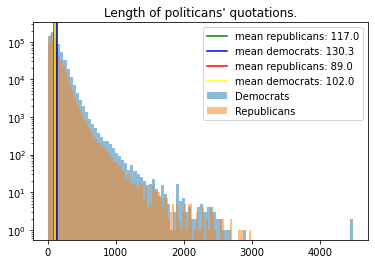

In [83]:
# Plot the distribution of quotes' length
democrats_lengths = democrats["quotation"].apply(lambda x: len(x))
republicans_lengths = republicans["quotation"].apply(lambda x: len(x))

plt.hist(democrats_lengths, log=True, alpha=0.5, label="Democrats", bins = 100)
plt.hist(republicans_lengths, log=True, alpha=0.5, label = "Republicans", bins = 100)
plt.axvline(republicans_lengths.mean(), color = 'green', label = f"mean republicans: {np.round(republicans_lengths.mean(), 1)}")
plt.axvline(democrats_lengths.mean(), color = 'blue', label = f"mean democrats: {np.round(democrats_lengths.mean(), 1)}")
plt.axvline(republicans_lengths.median(), color = 'red', label = f"mean republicans: {np.round(republicans_lengths.median(), 1)}")
plt.axvline(democrats_lengths.median(), color = 'yellow', label = f"mean democrats: {np.round(democrats_lengths.median(), 1)}")

plt.title("Length of politicans' quotations.")
plt.legend()
plt.show()

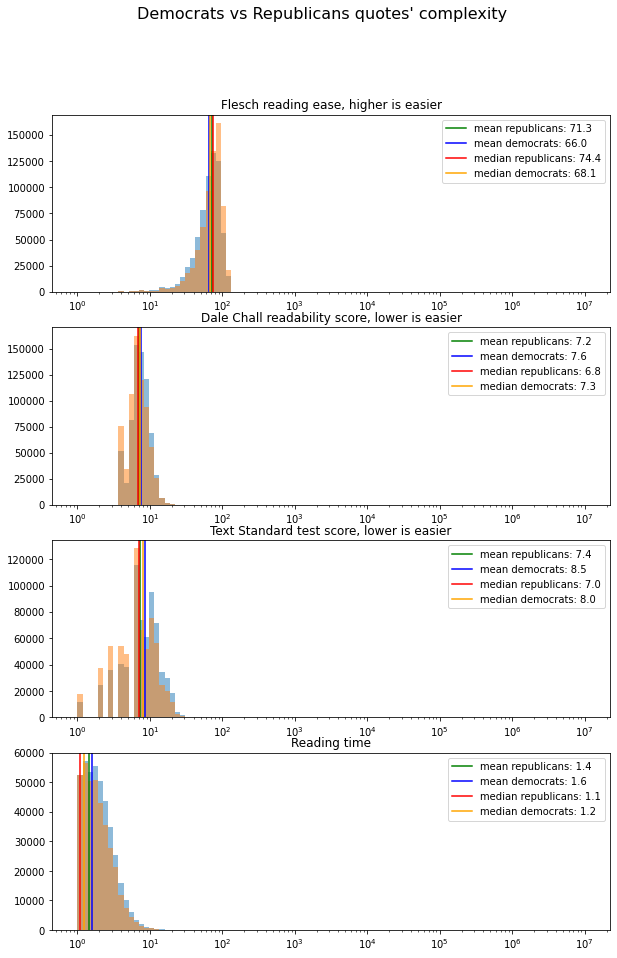

In [87]:
#plotting distribution, mean and median for both republicans and democrats, in the four calculated scores
metrics_columns=['flesch_reading_ease','dale_chall_readability_score','text_standard','reading_time']
def plot_metrics_scores(dem_data,rep_data, title):

    fig, axs = plt.subplots(4, figsize = (10,15))
    fig.suptitle(title, fontsize=16)

    axs[0].hist(dem_data['flesch_reading_ease'], alpha=0.5,bins=np.logspace(0, np.log10(10**7), 100))
    axs[0].hist(rep_data['flesch_reading_ease'], alpha=0.5,bins=np.logspace(0, np.log10(10**7), 100))
    axs[0].set_title("Flesch reading ease, higher is easier")
    axs[1].hist(dem_data['dale_chall_readability_score'], alpha=0.5,bins=np.logspace(0, np.log10(10**7), 100))
    axs[1].hist(rep_data['dale_chall_readability_score'], alpha=0.5,bins=np.logspace(0, np.log10(10**7), 100))
    axs[1].set_title("Dale Chall readability score, lower is easier")
    axs[2].hist(dem_data['text_standard'], alpha=0.5,bins=np.logspace(0, np.log10(10**7), 100))
    axs[2].hist(rep_data['text_standard'], alpha=0.5,bins=np.logspace(0, np.log10(10**7), 100))
    axs[2].set_title("Text Standard test score, lower is easier")
    axs[3].hist(dem_data['reading_time'], alpha=0.5,bins=np.logspace(0, np.log10(10**7), 100))
    axs[3].hist(rep_data['reading_time'], alpha=0.5,bins=np.logspace(0, np.log10(10**7), 100))
    axs[3].set_title("Reading time")
    metrics_rep = rep_data[metrics_columns]
    metrics_dem = dem_data[metrics_columns]
    mean_dem = metrics_dem.mean(axis = 0)
    median_dem = metrics_dem.median(axis = 0)
    mean_rep = metrics_rep.mean(axis = 0)
    median_rep = metrics_rep.median(axis = 0)

    for i,ax in enumerate(axs):
        ax.axvline(mean_rep[i], color = 'green', label = f"mean republicans: {np.round(mean_rep[i], 1)}")
        ax.axvline(mean_dem[i], color = 'blue', label = f"mean democrats: {np.round(mean_dem[i], 1)}")
        ax.axvline(median_rep[i], color = 'red', label = f"median republicans: {np.round(median_rep[i], 1)}")
        ax.axvline(median_dem[i], color = 'orange', label = f"median democrats: {np.round(median_dem[i], 1)}")
        ax.legend()
        ax.set_xscale('log')
    plt.show()
plot_metrics_scores(democrats,republicans,"Democrats vs Republicans quotes' complexity")


In [81]:
# ten most common speakers
pop_dem_speakers=democrats["speaker"].value_counts()[:10]
pop_rep_speakers=republicans["speaker"].value_counts()[:10]
print("Most common Democrat's speakers")
print(pop_dem_speakers)
print("\nMost common Republican's speakers")
print(pop_rep_speakers)

Most common Democrat's speakers
Barack Obama        156738
Hillary Clinton     100493
Joe Biden            58637
Nancy Pelosi         52222
Elizabeth Warren     48578
Andrew Cuomo         45714
John Kerry           28801
Pete Buttigieg       24619
Kamala Harris        21799
Bill Clinton         17443
Name: speaker, dtype: int64

Most common Republican's speakers
Donald Trump      510918
John McCain        21856
Rick Scott         16791
John Kasich        15354
Rudy Giuliani      14643
Ron DeSantis       10173
George W. Bush      9122
Mike Huckabee       8691
Newt Gingrich       8562
Rick Perry          8360
Name: speaker, dtype: int64


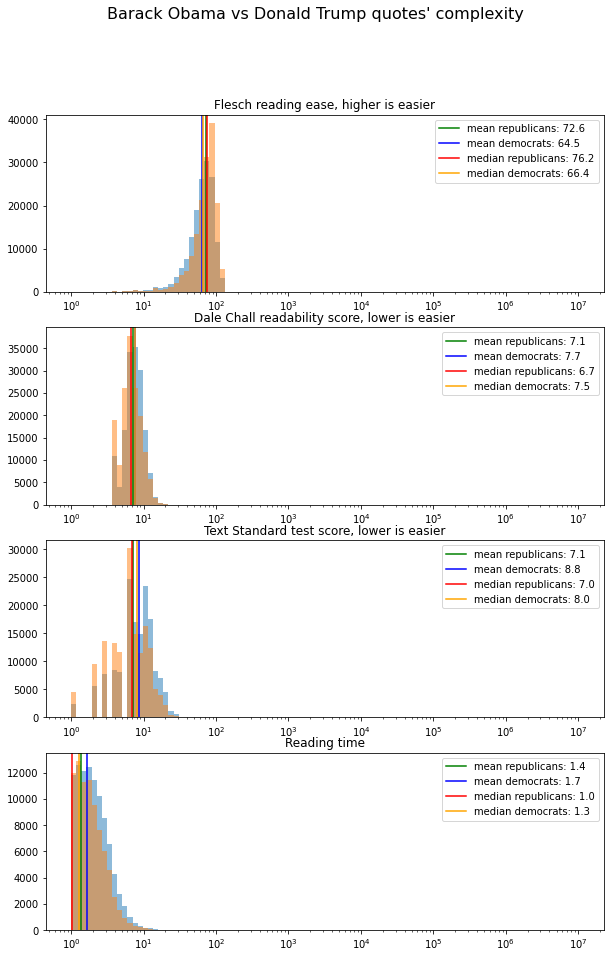

In [88]:
#repeating the plotting for the two most common speakers of the parties
# To have a clearer visualization we take into consideration the same amount of quotations from both parties
barack_obama = democrats[democrats['speaker']== 'Barack Obama']
donal_trump = republicans[republicans['speaker']== 'Donald Trump']
donal_trump = donal_trump.sample( barack_obama['quote_id'].count())
plot_metrics_scores(barack_obama,donal_trump, "Barack Obama vs Donald Trump quotes' complexity")

In [95]:
years = [2015,2016,2017,2018,2019,2020]
for year in years:
    year_df_rep = republicans[republicans['Date-Time'] <= f"{year}-1-31"]
    year_df_rep = republicans[republicans['Date-Time'] >= f"{year}-1-1"]
    year_df_dem = democrats[democrats['Date-Time'] <= f"{year}-1-31"]
    year_df_dem = democrats[democrats['Date-Time'] >= f"{year}-1-1"]
    print(f"\n{year}\n")
    for metric in metrics_columns:
        print(f"{metric} for democrats: " + str(year_df_dem[metric].mean()))
        print(f"{metric} for republicans: " + str(year_df_rep[metric].mean()))


2015

flesch_reading_ease for democrats: 66.01516964500972
flesch_reading_ease for republicans: 71.30792830219747
dale_chall_readability_score for democrats: 7.5800317680126525
dale_chall_readability_score for republicans: 7.1631339930965945
text_standard for democrats: 8.535138861937776
text_standard for republicans: 7.409360464774404
reading_time for democrats: 1.5902663750066155
reading_time for republicans: 1.4244578709992302

2016

flesch_reading_ease for democrats: 66.45330043963386
flesch_reading_ease for republicans: 71.02108927080548
dale_chall_readability_score for democrats: 7.531260882241071
dale_chall_readability_score for republicans: 7.194043536512524
text_standard for democrats: 8.45844909843203
text_standard for republicans: 7.450601089650302
reading_time for democrats: 1.578387352755483
reading_time for republicans: 1.4212864275507944

2017

flesch_reading_ease for democrats: 66.5534606677269
flesch_reading_ease for republicans: 70.52003825584802
dale_chall_readabili

This is just an initial and superficial analysis, but it clearly seems to suggest that there's a difference, not even so slight, between the two parties.
In particular, Republicans' quotes have always shown a lower complexity score.